# Feature Engineering-All Techniques To Handle Missing Values


Types of Missing Data

When considering the potential impact of the missing data on the registry findings, it is important to consider the underlying reasons for why the data are missing.14 Missing data are typically grouped into three categories:

Missing completely at random (MCAR). When data are MCAR, the fact that the data are missing is independent of the observed and unobserved data.15 In other words, no systematic differences exist between participants with missing data and those with complete data. For example, some participants may have missing laboratory values because a batch of lab samples was processed improperly. In these instances, the missing data reduce the analyzable population of the study and consequently, the statistical power, but do not introduce bias: when data are MCAR, the data which remain can be considered a simple random sample of the full data set of interest. MCAR is generally regarded as a strong and often unrealistic assumption.

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('titanic.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
df[df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


# Missing not at random (MNAR).(Systematic Missing Values)

When data are MNAR, the fact that the data are missing is systematically related to the unobserved data, that is, the missingness is related to events or factors which are not measured by the researcher. To extend the previous example, the depression registry may encounter data that are MNAR if participants with severe depression are more likely to refuse to complete the survey about depression severity. As with MAR data, complete case analysis of a data set containing MNAR data may or may not result in bias; if the complete case analysis is biased, however, the fact that the sources of missing data are themselves unmeasured means that (in general) this issue cannot be addressed in analysis and the estimate of effect will likely be biased.

In [7]:
import numpy as np
df['cabin_null']=np.where(df['Cabin'].isnull(),1,0)

#find the percentage of null values
df['cabin_null'].mean()

0.7710437710437711

In [8]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cabin_null
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [9]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'cabin_null'],
      dtype='object')

In [10]:
df['cabin_null']

0      1
1      0
2      1
3      0
4      1
      ..
886    1
887    0
888    1
889    0
890    1
Name: cabin_null, Length: 891, dtype: int32

In [11]:
df.groupby(['Survived'])['cabin_null'].mean()

Survived
0    0.876138
1    0.602339
Name: cabin_null, dtype: float64

# Missing at random (MAR).
 
When data are MAR, the fact that the data are missing is systematically related to the observed but not the unobserved data.15 For example, a registry examining depression may encounter data that are MAR if male participants are less likely to complete a survey about depression severity than female participants. That is, if probability of completion of the survey is related to their sex (which is fully observed) but not the severity of their depression, then the data may be regarded as MAR. Complete case analyses, which are based on only observations for which all relevant data are present and no fields are missing, of a data set containing MAR data may or may not result in bias. If the complete case analysis is biased, however, proper accounting for the known factors (in the above example, sex) can produce unbiased results in analysis.

Men -- > Hide their salary
Women --> Hide their Age

##All the techniques of handling missing values

1. Mean/Median/Mode replacement
2. Random sample Imputation
3. Capturing NAN values with a new feature
4. End of Distribution imputaion
5. Arbitrary imputaion
6. Frequent Catagories imputation


# 1.Mean/Median/Mode replacement

When we should apply??

Mean/median imputaion has the assumption that the data are missing completetly at random(MCAR).

We solve this by replacing the NAN with the most frequent occurances of the variables.

In [12]:
df=pd.read_csv('titanic.csv', usecols=['Age','Fare','Survived'])

In [13]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [14]:
#lets go and see the percentage of missing values
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [15]:
def impute_nan(df,variable,median):
    df[variable+'_meadian']=df[variable].fillna(median)
    

In [16]:
median=df.Age.median()

In [17]:

median

28.0

In [18]:
impute_nan(df,'Age',median)
df.head()

,Survived,Age,Fare,Age_meadian
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


In [19]:
df.isnull().mean()

Survived       0.000000
Age            0.198653
Fare           0.000000
Age_meadian    0.000000
dtype: float64

In [20]:
df['Age_meadian']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    28.0
889    26.0
890    32.0
Name: Age_meadian, Length: 891, dtype: float64

In [21]:
print(df['Age'].std())
print(df['Age_meadian'].std())


14.526497332334044
13.019696550973194


In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

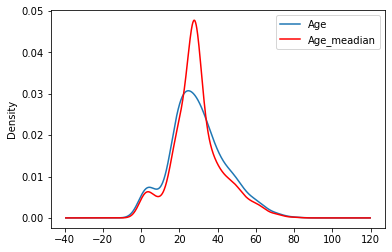

In [23]:
fig = plt.figure()
ax=fig.add_subplot(111)
df['Age'].plot(kind='kde',ax=ax)
df.Age_meadian.plot(kind='kde',ax=ax,color='red')
lines,labels=ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

##Advantages and disadvantages of Mean/Median Imputation

1.Advantages

 - Easy to implement (Robust to outliers)
 - Faster way to  obtain the complete dataset

2.Disadvantages
 
 - Change or Distortion in the original variance
 - Impact Correlation

# Ramdon Sample Imputation


Random Sample Imputation

Aim: Random sample imputation consists of taking random observation from the dataset and we use this observation to replace the nan values

When should it be used? It assumes that the data are missing completely at random(MCAR)

In [24]:
import pandas as pd

df=pd.read_csv('titanic.csv', usecols=['Age','Fare','Survived'])

In [25]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [26]:
df.isnull()

,Survived,Age,Fare
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
886,False,False,False
887,False,False,False
888,False,True,False
889,False,False,False


In [27]:
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [28]:


df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [29]:
df['Age'].dropna().sample(df['Age'].isnull().sum(),random_state=0)


423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
       ...  
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: Age, Length: 177, dtype: float64

In [30]:
df[df['Age'].isnull()].index


Int64Index([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,
            ...
            832, 837, 839, 846, 849, 859, 863, 868, 878, 888],
           dtype='int64', length=177)

In [31]:
def impute_nan(df,variable,median):
    df[variable+"_median"]=df[variable].fillna(median)
    df[variable+"_random"]=df[variable]
    
    ##It will have the random sample to fill the na
    random_sample=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    
    
    ##pandas need to have same index in order to merge the dataset
    random_sample.index=df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable+'_random']=random_sample

In [32]:
median=df.Age.median()


In [33]:
median


28.0

In [34]:
impute_nan(df,'Age',median)

In [35]:
df.head()

,Survived,Age,Fare,Age_median,Age_random
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0


In [36]:
df.isnull().sum()

Survived        0
Age           177
Fare            0
Age_median      0
Age_random      0
dtype: int64

In [37]:
import matplotlib.pyplot as plt
%matplotlib inline

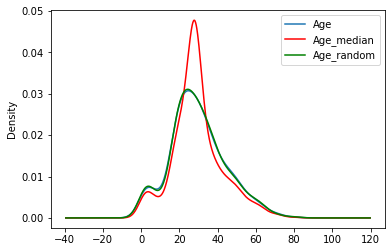

In [38]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde', ax=ax)
df.Age_median.plot(kind='kde', ax=ax, color='red')
df.Age_random.plot(kind='kde', ax=ax, color='green')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

Capturing NAN values with a new feature


It works well if the data are not missing completely at random

In [39]:
df=pd.read_csv('titanic.csv', usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [40]:
import numpy as np
df['Age_NAN']=np.where(df['Age'].isnull(),1,0)

In [41]:
df.head()

,Survived,Age,Fare,Age_NAN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0


In [42]:
df.Age.median()


28.0

In [43]:
df['Age'].fillna(df.Age.median(),inplace=True)


In [44]:
df.head(10)


,Survived,Age,Fare,Age_NAN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
5,0,28.0,8.4583,1
6,0,54.0,51.8625,0
7,0,2.0,21.0750,0
8,1,27.0,11.1333,0
9,1,14.0,30.0708,0


Advantages

Easy to implement
Captures the importance of missing values

Disadvantages

Creating Additional Features(Curse of Dimensionality)

End of Distribution imputation


In [45]:

df=pd.read_csv('titanic.csv', usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


<AxesSubplot:>

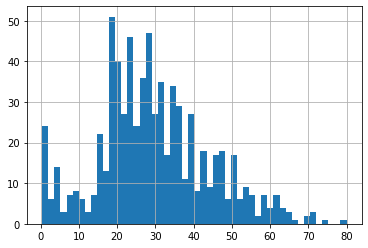

In [46]:
df.Age.hist(bins=50)


In [47]:
extreme=df.Age.mean()+3*df.Age.std()


C:\Users\X016745\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

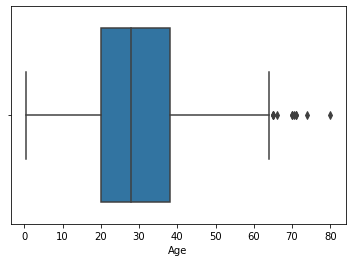

In [48]:
import seaborn as sns
sns.boxplot('Age',data=df)


In [49]:
def impute_nan(df,variable,median,extreme):
    df[variable+"_end_distribution"]=df[variable].fillna(extreme)
    df[variable].fillna(median,inplace=True)

In [50]:

impute_nan(df,'Age',df.Age.median(),extreme)

In [51]:
df.head()


,Survived,Age,Fare,Age_end_distribution
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


<AxesSubplot:>

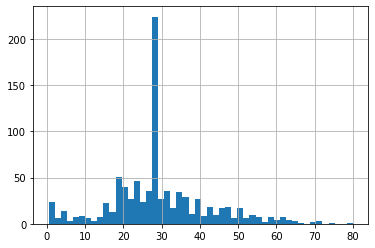

In [52]:
df['Age'].hist(bins=50)


<AxesSubplot:>

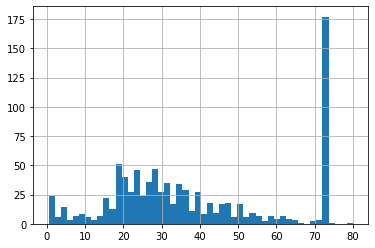

In [53]:
df['Age_end_distribution'].hist(bins=50)


C:\Users\X016745\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age_end_distribution'>

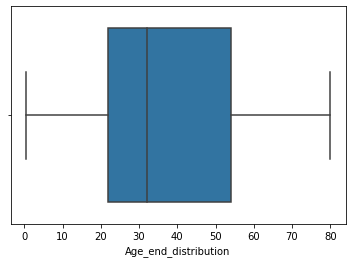

In [54]:
sns.boxplot('Age_end_distribution',data=df)


# Arbitrary Value Imputation


this technique was derived from kaggle competition.


It consists of replacing NAN by an arbitrary value

In [55]:
import pandas as pd


In [56]:
df=pd.read_csv("titanic.csv", usecols=["Age","Fare","Survived"])

df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [58]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [59]:
def impute_nan(df,variable):
    df[variable+'_zero']=df[variable].fillna(0)
    df[variable+'_hundred']=df[variable].fillna(100)

<AxesSubplot:>

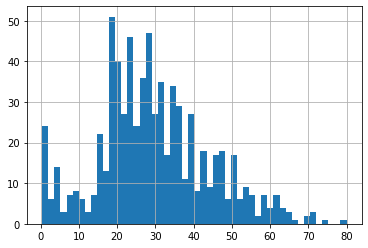

In [60]:
df['Age'].hist(bins=50)

Advantages

Easy to implement
Captures the importance of missingess if there is one

Disadvantages


Distorts the original distribution of the variable
If missingess is not important, it may mask the predictive power of the original variable by distorting its distribution
Hard to decide which value to use